In [1]:
#import the libraries needed for reconstruction

#numpy manipulates python arrays to better computing

import numpy as np

#matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy

import matplotlib.pyplot as plt

#load is used to load an image file located in the data directory (skimage.data)

from skimage.data import load

#imread is used to load an image from file

from skimage.io import imread

#radon calculates the radon transform of an image given specified projection angles

from skimage.transform import radon

#rescale scales an image by a certain factor

from skimage.transform import rescale

#iradon performs an inverse radon transform

from skimage.transform import iradon

In [2]:
#import any image under certain paramteres

def readImage():
	return load("phantom.png", as_gray=True)

In [3]:
#define the image and rescale it

image = readImage()
image = rescale(image, scale=0.4, mode='reflect', multichannel=False)

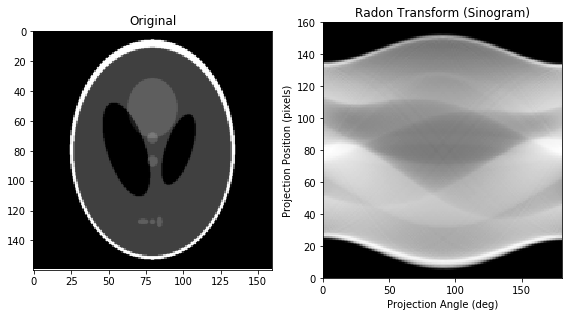

In [4]:
#create axes for original image and sinogram

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

#titling the original image "Original" 

ax1.set_title("Original")

#show image

ax1.imshow(image, cmap=plt.cm.Greys_r)

#create a sinogram for the image using radon transform (forward projection)

theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta, circle=True)

#titling the sinogram "Radon transform (Sinogram)"

ax2.set_title("Radon Transform (Sinogram)")

#labeling the x-axis "Projection angle (deg)" and the y-axis "Projection position (pixels)" on the sinogram

ax2.set_xlabel("Projection Angle (deg)")
ax2.set_ylabel("Projection Position (pixels)")

#show sinogram

ax2.imshow(sinogram, cmap=plt.cm.Greys_r, extent=(0, 180, 0, sinogram.shape[0]), aspect='auto')

#adjusting the location of the axes to make room for all the labels

fig.tight_layout()

#opens interactive window that displays the original image and the sinogram

plt.show()

In [5]:
#reconstructing the image using filtered back projection (FBP)

reconstruction_fbp = iradon(sinogram, theta=theta, circle=True)

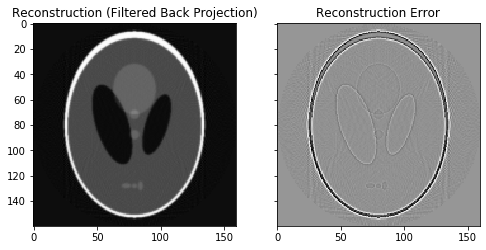

In [6]:
#define a variable for the kwargs function that is used in calculating the error

imkwargs = dict(vmin=-0.2, vmax=0.2)

#create axes for the reconstructed image and the error plot

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5), sharex=True, sharey=True)

#titling the reconstructed image "Reconstruction (Filtered back projection)" 

ax1.set_title("Reconstruction (Filtered Back Projection)")

#show reconstruction

ax1.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)

#titling the error plot "Reconstruction error (Filtered back projection)"

ax2.set_title("Reconstruction Error")

#show error plot
#use kwargs because it is used to pass a keyworded, variable-length argument list
#double stars allows us to pass through any number of keyword arguments

ax2.imshow(reconstruction_fbp - image, cmap=plt.cm.Greys_r, **imkwargs)

#opens interactive window that displays the reconstructed image and the error

plt.show()

In [7]:
#calculates the error value of the reconstruction

error = reconstruction_fbp - image
print('FBP rms reconstruction error: %.3g' % np.sqrt(np.mean(error**2)))

FBP rms reconstruction error: 0.0288
